In [1]:
import numpy as np                 # for numerical operations
import pandas as pd                # for data manipulation
import matplotlib.pyplot as plt    # for plotting
import seaborn as sns              # for advanced plotting

In [2]:
#load the data
pre_data = pd.read_csv('previous_application.csv')
app_data = pd.read_csv('application_data.csv')

In [3]:
print(pre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [4]:
# check the top 5 rows to check the data 
print(pre_data.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [5]:
# printing the statistical summary
print(pre_data.describe())

         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

In [6]:
# checking info in application data
print(app_data.info())

#checking the top 5 rows in the data 
print(app_data.head())

# printing the statistical summery
print(app_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.

In [7]:
# Data cleaning
# checking for missing value
missing_value_pre = pre_data.isnull().sum()

# Calculate percentage of missing values for each column
miss_value_pre_percentage = (missing_value_pre / len(pre_data)) * 100
print('miss_value_pre_percentage:')
print(miss_value_pre_percentage)

miss_value_pre_percentage:
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                

In [8]:
missing_value_app = app_data.isnull().sum()
print(missing_value_app)

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [9]:
# showing all rows
pd.set_option('display.max_rows', None)

# calculating percentage of missing values for each column
miss_value_app_percentage = (missing_value_app/len(app_data))*100
print('miss_value_app_percentage is:')
print(miss_value_app_percentage)


miss_value_app_percentage is:
SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG

In [10]:
# Find the names of columns that have more than 60% missing values
columns_app_to_drop=miss_value_app_percentage[miss_value_app_percentage>60].index

# drop these columns from the original DataFrame
app_data_clean= app_data.drop(columns=columns_app_to_drop)

# Display the remaining columns
print('remaining columns:',app_data_clean.columns)

remaining columns: Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)


In [11]:
# find the names of columns that have more than 60% missing values for previous_application.csv
columns_pre_to_drop = miss_value_pre_percentage[miss_value_pre_percentage>60].index

# drop these columns from original DataFrame
pre_data_clean = pre_data.drop(columns=columns_pre_to_drop)

# display the remaining columns
print('remaining columns:', pre_data_clean.columns)

remaining columns: Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [12]:
# Check for remaining missing values in each column
print(pre_data_clean.isnull().sum())

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_DOWN_PAYMENT               895844
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              895844
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [13]:
# filling missing numerical values 

# selecting numerical columns with missing values
pre_select_numerical_with_nun = pre_data_clean.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values in each numeric column with the mean

for col in pre_select_numerical_with_nun:
    if pre_data_clean[col].isnull().sum()>0:  # Check if there are missing values
        pre_data_clean[col].fillna(pre_data_clean[col].mean(), inplace=True)

In [14]:
# Check for any remaining missing values
print(pre_data_clean.isnull().sum())

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT                    0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT                   0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [15]:
# selecting string columns with missing values
pre_select_string_with_nun = pre_data_clean.select_dtypes(include=['object']).columns

for col in pre_select_string_with_nun:
    if pre_data_clean[col].isnull().sum()>0:
        pre_data_clean[col].fillna('Unknown', inplace=True)

In [16]:
# filling valous for columns that have missing values for app_data_clean

#selecting numerical colmns
app_select_numerical_with_nun= app_data_clean.select_dtypes(include=['int64','float64']).columns

# filling numerical data
for columns in app_select_numerical_with_nun:
    if app_data_clean[columns].isnull().sum()>0:
        app_data_clean[columns].fillna(app_data_clean[columns].mean(),inplace=True)

In [17]:
#selecting string columns with missing values for app_data_clean
app_select_string_with_nun = app_data_clean.select_dtypes(include=['object']).columns

# fillinh with unknon 
for col in app_select_string_with_nun:
    if app_data_clean[col].isnull().sum():
        app_data_clean[col].fillna('unknown', inplace=True)


In [18]:
# Check for any remaining missing values
print(app_data_clean.isnull().sum())

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [74]:
# List of AMT columns to convert to int
app_amt_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','CNT_FAM_MEMBERS']

# Converting each column to integer
for col in app_amt_columns:
    app_data_clean[col] = app_data_clean[col].astype('int')

In [75]:
# List of day-related columns to make positive
days_columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

# Converting each column to its absolute value
for col in days_columns:
    app_data_clean[col] = app_data_clean[col].abs()

In [76]:
# Convert `AMT_*` columns to integer
amt_columns_previous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']
for col in amt_columns_previous:
    pre_data_clean[col] = pre_data_clean[col].astype('int')

# List of `DAYS_*` columns to convert to absolute values
days_columns_previous = ['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 
                         'DAYS_TERMINATION']
for col in days_columns_previous:
    pre_data_clean[col] = pre_data_clean[col].abs()

In [77]:
print(app_data_clean.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105)


In [78]:
# Analyzing data

In [79]:
# Deviding the data into two groups based on the Target Variable
have_difficulties= app_data_clean[app_data_clean['TARGET']==1]
have_no_difficulties= app_data_clean[app_data_clean['TARGET']==0]

# Display the first few rows of each group to inspect 
print("customers with difficulties:")
print(have_difficulties.head())

print("customers with no difficulties")
print(have_no_difficulties.head())





customers with difficulties:
    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0            202500      406597        24700   
26               Y             0            112500      979992        27076   
40               Y             0            202500     1193580        35028   
42               N             0            135000      288873        16258   
81               Y             0             81000      252000        14593   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_2

In [80]:
# Data Analysis using plots - 


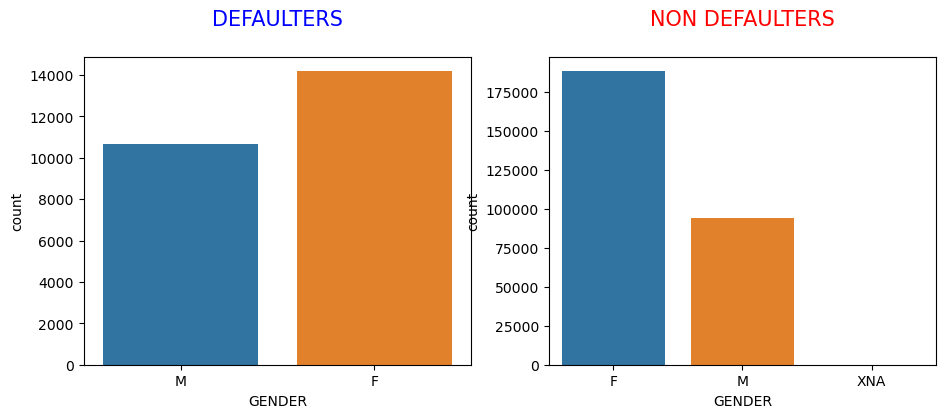

In [511]:
# Analysing how loan defaults are affected by gender
# setting the size 
plt.figure(figsize=[11,4])

#ploting with Defaulters (people who had difficulties in repayment)
plt.subplot(1, 2, 1)  # First subplot in a 1-row, 2-column layout (left side)
sns.countplot(x='CODE_GENDER', data=have_difficulties)  # Count plot based on gender for defaulters
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.xlabel('GENDER')

# Plotting for Non-Defaulters (people who had no difficulties in repayment)
plt.subplot(1, 2, 2)  # Second subplot in a 1-row, 2-column layout (right side)
sns.countplot(x='CODE_GENDER', data=have_no_difficulties)  # Count plot based on gender for non-defaulters
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Red'})
plt.xlabel('GENDER')

# Display the plots
plt.show()


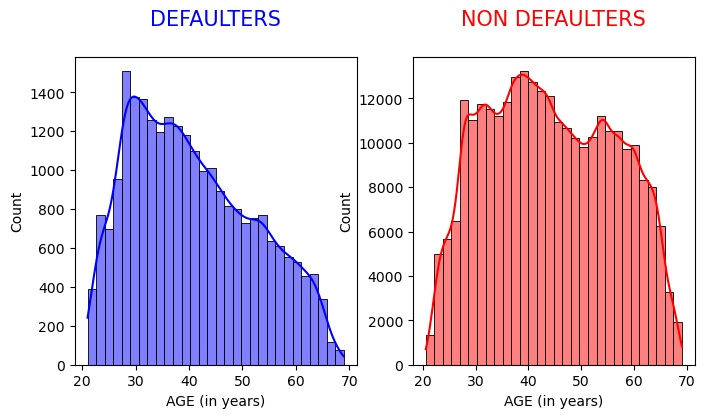

In [429]:
# Setting a  figure size
plt.figure(figsize=[8,4]) 

# Plotting age distribution for Defaulters (people who had difficulties)
plt.subplot(1, 2, 1)  # First subplot on the left side
sns.histplot(have_difficulties['DAYS_BIRTH'] / 365, bins=30, color='blue', kde=True)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.xlabel('AGE (in years)')

# Plotting age distribution for Non-Defaulters (people who had no difficulties)
plt.subplot(1, 2, 2)  # Second subplot on the right side
sns.histplot(have_no_difficulties['DAYS_BIRTH'] / 365, bins=30, color='red', kde=True)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Red'})
plt.xlabel('AGE (in years)')

# Displaying the plots
plt.show()


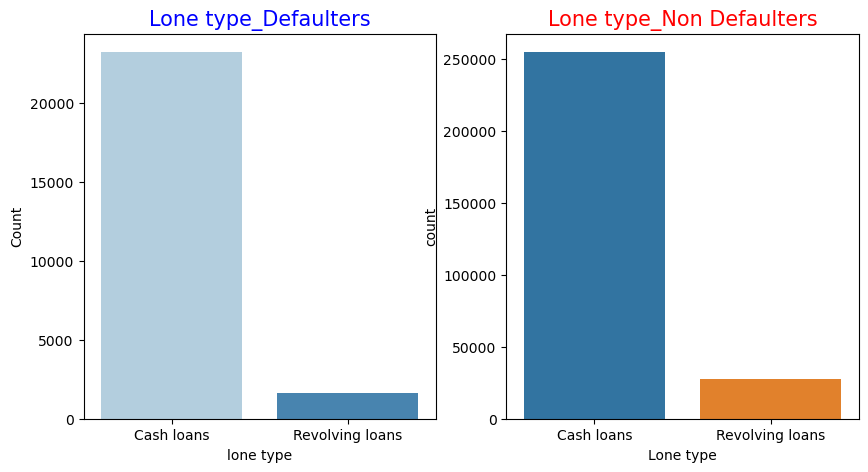

In [512]:
#counting the occurrence of each loan type for defaulters and non-defaulters

#setting the figure size
plt.figure(figsize=[10,5])

#ploting the barchart for defaulters
plt.subplot(1,2,1) # 1-row , 2-columns, on the leftside
sns.countplot(x='NAME_CONTRACT_TYPE', data= have_difficulties, palette='Blues')
plt.title('Lone type_Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.xlabel('lone type')
plt.ylabel('Count')

#ploting the barchart for non_defaulters
plt.subplot(1,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE', data= have_no_difficulties)
plt.title('Lone type_Non Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Red'})
plt.xlabel('Lone type')
plt.ylabel('count')

plt.show()



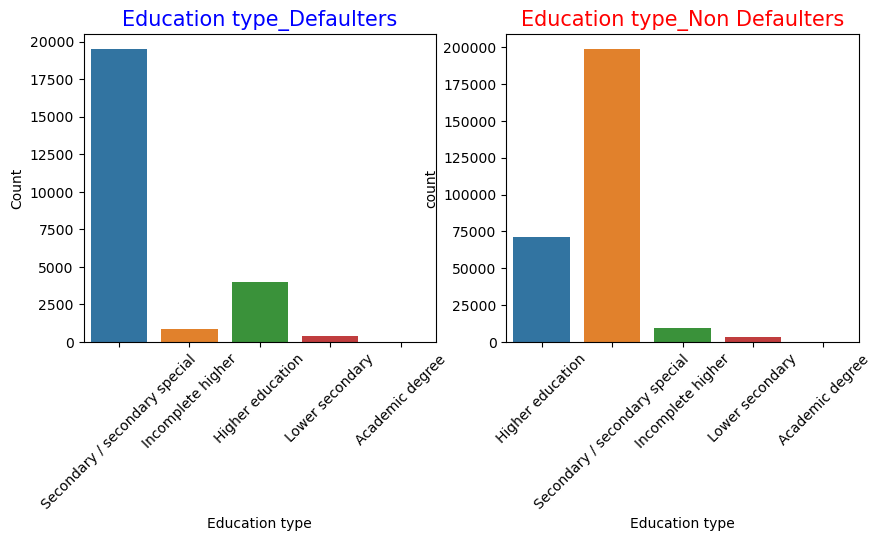

In [93]:
#counting the effect of education type on defaulters and non-defaulters

#setting the figure size
plt.figure(figsize=[10,4])

#ploting the barchart for defaulters
plt.subplot(1,2,1) # 1-row , 2-columns, on the leftside
sns.countplot(x='NAME_EDUCATION_TYPE', data= have_difficulties)
plt.title('Education type_Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.xlabel('Education type')
plt.xticks(rotation=45) 
plt.ylabel('Count')

#ploting the barchart for non_defaulters
plt.subplot(1,2,2)
sns.countplot(x='NAME_EDUCATION_TYPE', data= have_no_difficulties)
plt.title('Education type_Non Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Red'})
plt.xlabel('Education type')
plt.xticks(rotation=45) 
plt.ylabel('count')

plt.show()


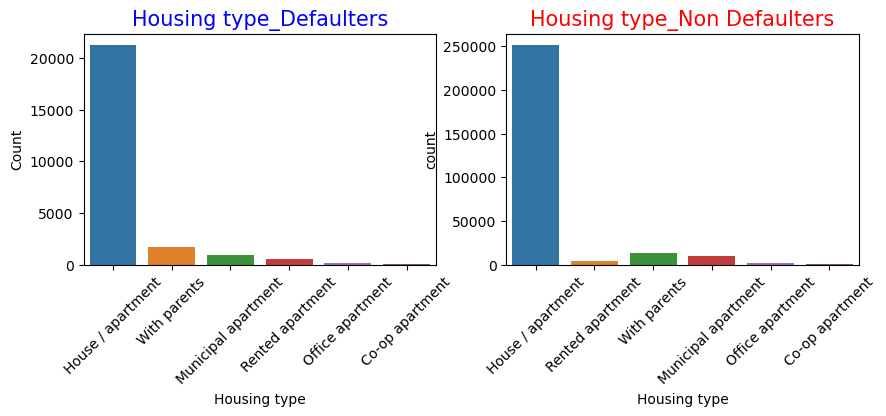

In [135]:
#counting the occurrence of housing type for defaulters and non-defaulters

#setting the figure size
plt.figure(figsize=[10,3])

#ploting the barchart for defaulters
plt.subplot(1,2,1) # 1-row , 2-columns, on the leftside
sns.countplot(x='NAME_HOUSING_TYPE', data= have_difficulties)
plt.title('Housing type_Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.xlabel('Housing type')
plt.xticks(rotation=45) 
plt.ylabel('Count')

#ploting the barchart for non_defaulters
plt.subplot(1,2,2)
sns.countplot(x='NAME_HOUSING_TYPE', data= have_no_difficulties)
plt.title('Housing type_Non Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Red'})
plt.xlabel('Housing type')
plt.xticks(rotation=45) 
plt.ylabel('count')

plt.show()


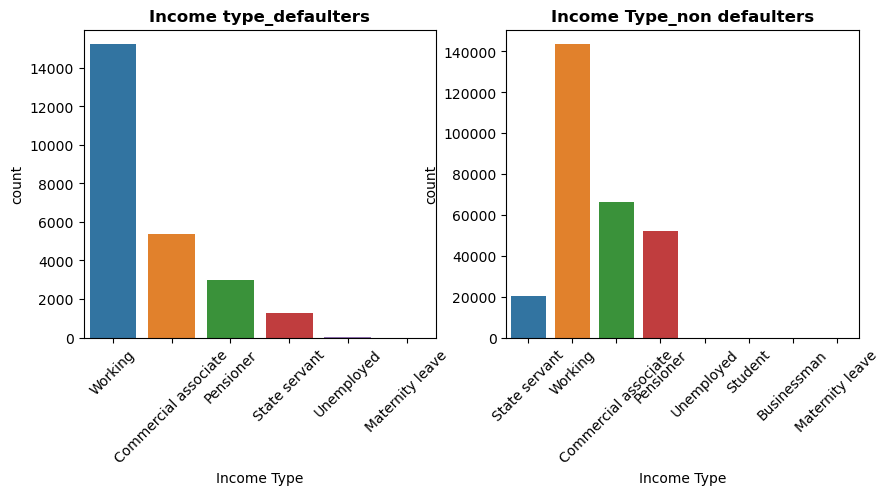

In [513]:
# counting the effect of income type on defaulters and non-defaulters

#setting the figure size
plt.figure(figsize=[10,4])

#ploting the barchart for defaulters
plt.subplot(1,2,1)
sns.countplot(x='NAME_INCOME_TYPE', data=have_difficulties)
plt.title('Income type_defaulters', fontweight='bold')
plt.xlabel('Income Type')
plt.xticks(rotation=45)
plt.ylabel('count')

#ploting the barchart for non_dedaulters
plt.subplot(1,2,2)
sns.countplot(x='NAME_INCOME_TYPE', data= have_no_difficulties)
plt.title('Income Type_non defaulters', fontweight='bold')
plt.xlabel('Income Type')
plt.xticks(rotation=45)
plt.ylabel('count')

plt.show()

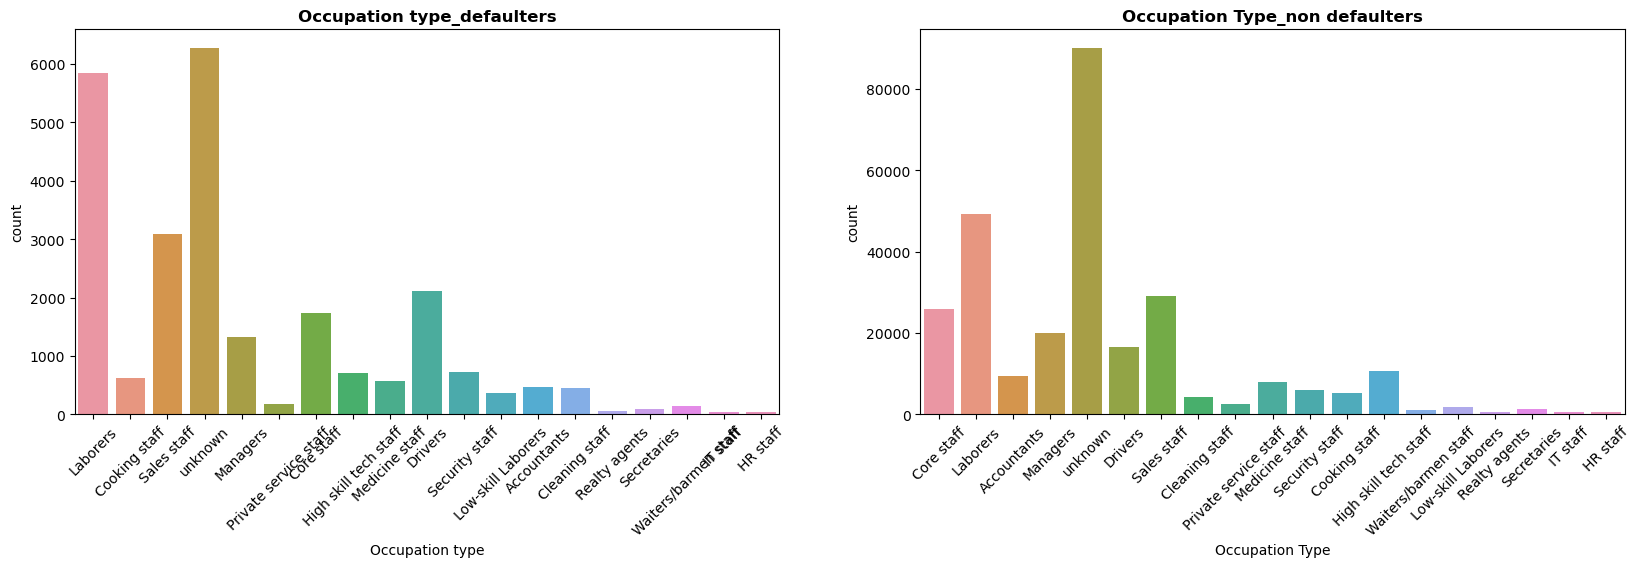

In [311]:
# counting the effect of Occupation Type on Defaulters and non-defaulters

# setting the figure size
plt.figure(figsize=[20,5])

# ploting the barchart for defaulters
plt.subplot(1,2,1)
sns.countplot(x='OCCUPATION_TYPE', data= have_difficulties)
plt.title('Occupation type_defaulters', fontweight='bold')
plt.xlabel('Occupation type')
plt.xticks(rotation=45)
plt.ylabel('count')


#ploting the barchart for non_dedaulters
plt.subplot(1,2,2)
sns.countplot(x='OCCUPATION_TYPE', data= have_no_difficulties)
plt.title('Occupation Type_non defaulters', fontweight='bold')
plt.xlabel('Occupation Type')
plt.xticks(rotation=45)
plt.ylabel('count')

plt.show()


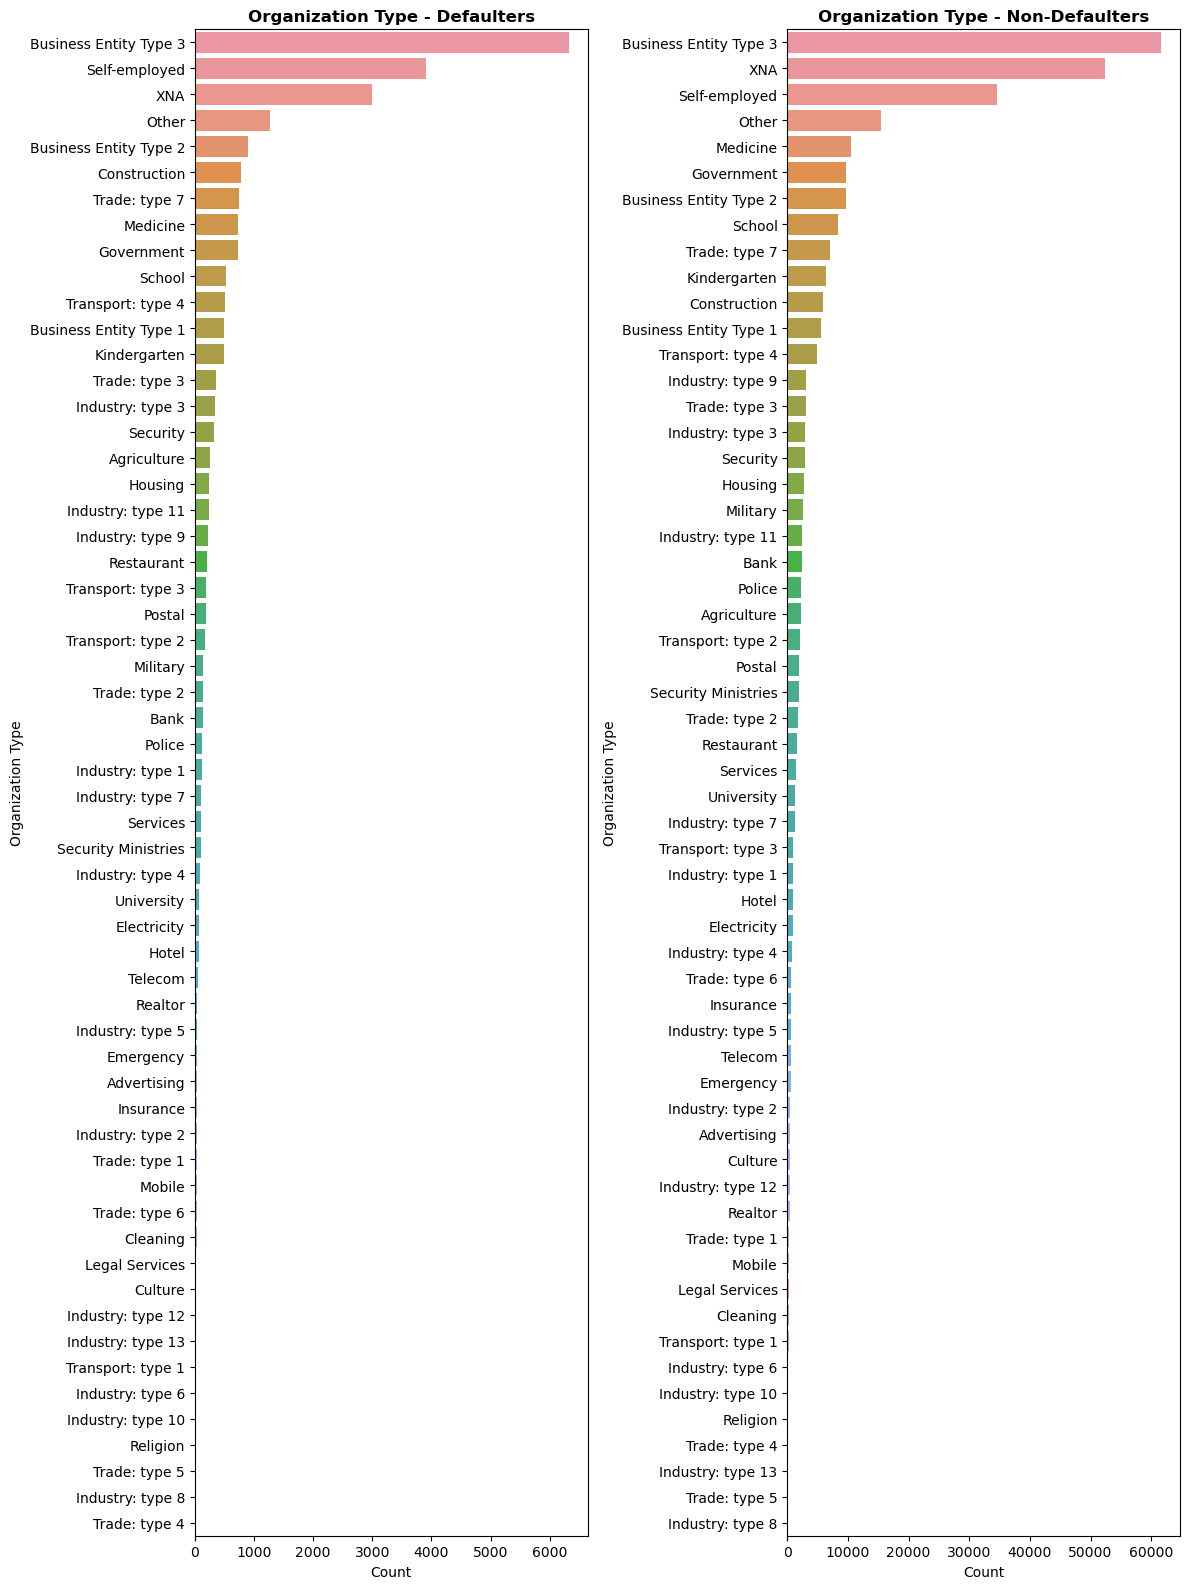

In [507]:
# setting the size
plt.figure(figsize=(12,16))

# ploting barchart for defaulters
plt.subplot(1, 2, 1)
sns.countplot(y='ORGANIZATION_TYPE', data=have_difficulties, order=have_difficulties['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Organization Type - Defaulters', fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Organization Type")

# ploting barchart for non_defaulters
plt.subplot(1, 2, 2)
sns.countplot(y='ORGANIZATION_TYPE', data=have_no_difficulties, order=have_no_difficulties['ORGANIZATION_TYPE'].value_counts().index)
plt.title('Organization Type - Non-Defaulters', fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Organization Type")

plt.tight_layout()
plt.show()

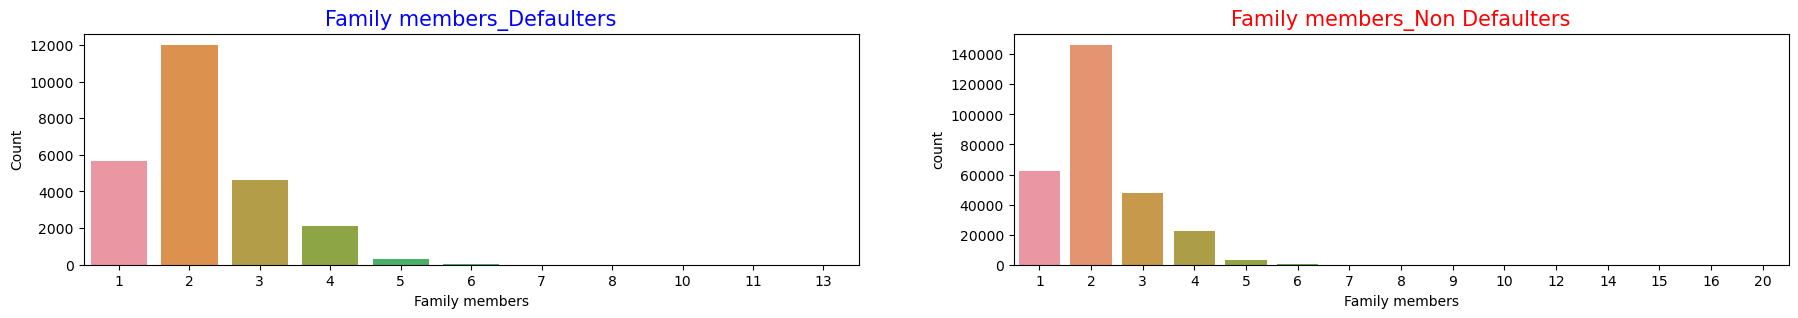

In [301]:
#counting the effect of number of family on defaulters and non-defaulters

#setting the figure size
plt.figure(figsize=[22,3])

#ploting the barchart for defaulters
plt.subplot(1,2,1) # 1-row , 2-columns, on the leftside
sns.countplot(x='CNT_FAM_MEMBERS', data= have_difficulties)
plt.title('Family members_Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Blue'})
plt.xlabel('Family members')
plt.ylabel('Count')

#ploting the barchart for non_defaulters
plt.subplot(1,2,2)
sns.countplot(x='CNT_FAM_MEMBERS', data= have_no_difficulties)
plt.title('Family members_Non Defaulters',fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'Red'})
plt.xlabel('Family members')
plt.ylabel('count')

plt.show()


<Axes: xlabel='TARGET', ylabel='AMT_CREDIT'>

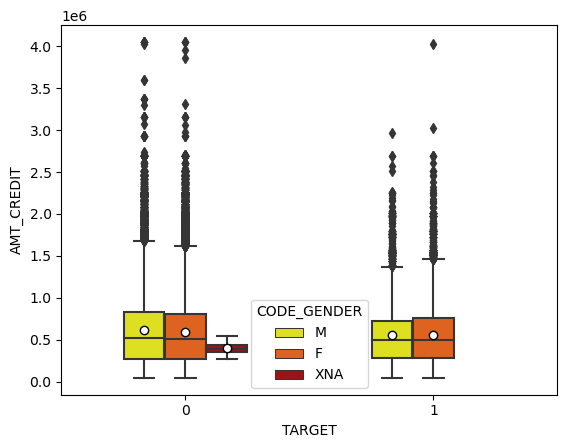

In [333]:
# finding the effect of loan amount(amount group) on defaulters and non_defaulters

sns.boxplot(x='TARGET', y='AMT_CREDIT', data=app_data_clean, width= 0.5,hue='CODE_GENDER',showmeans=True,
            meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black'}, palette='hot_r')



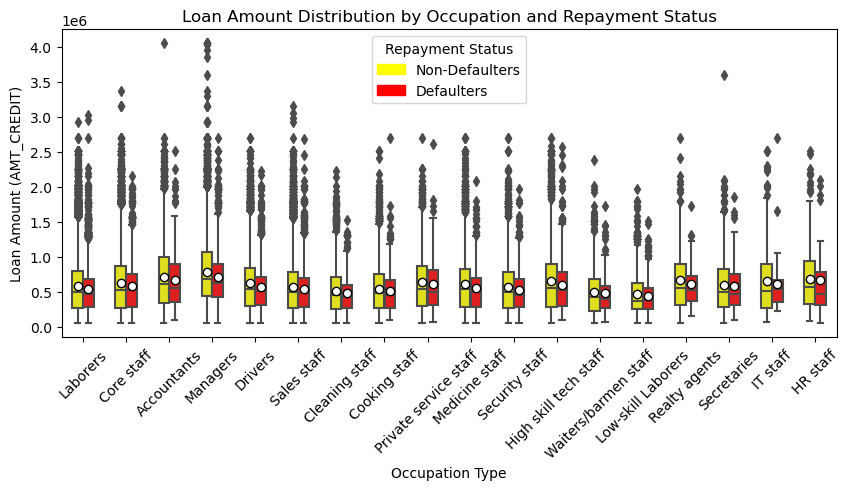

In [356]:
#Distribution of Loan Amount (AMT_CREDIT) by Occupation Type and Repayment Behavior

import matplotlib.patches as mpatches

plt.figure(figsize=[10,4])
sns.boxplot(x='OCCUPATION_TYPE', y='AMT_CREDIT', hue='TARGET', data=app_data, width=0.5, showmeans=True,
            meanprops={'marker':'o','markerfacecolor':'white','markeredgecolor':'black'}, 
            palette={0: 'yellow', 1: 'red'})  # Custom palette for clear differentiation

# Setting titles and labels for axes
plt.title("Loan Amount Distribution by Occupation and Repayment Status")
plt.xlabel("Occupation Type")
plt.ylabel("Loan Amount (AMT_CREDIT)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Custom legend
yellow_patch = mpatches.Patch(color='yellow', label='Non-Defaulters')
red_patch = mpatches.Patch(color='red', label='Defaulters')
plt.legend(handles=[yellow_patch, red_patch], title='Repayment Status')

# Display the plot
plt.show()

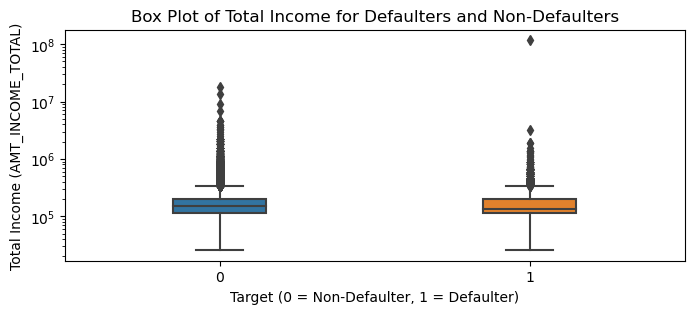

In [359]:
# finding the effect of total income on defaulters and non_difaulters

# Setting the figure size
plt.figure(figsize=(8,3))

# ploting boxplot of total incom for individuals with repayment difficulties and without repayment difficulties 
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_data_clean,width=0.3)
plt.xlabel("Target (0 = Non-Defaulter, 1 = Defaulter)")
plt.ylabel("Total Income (AMT_INCOME_TOTAL)")
plt.title("Box Plot of Total Income for Defaulters and Non-Defaulters")
plt.yscale('log')  # Using logarithmic scale for consistency
# Display the plot
plt.show()

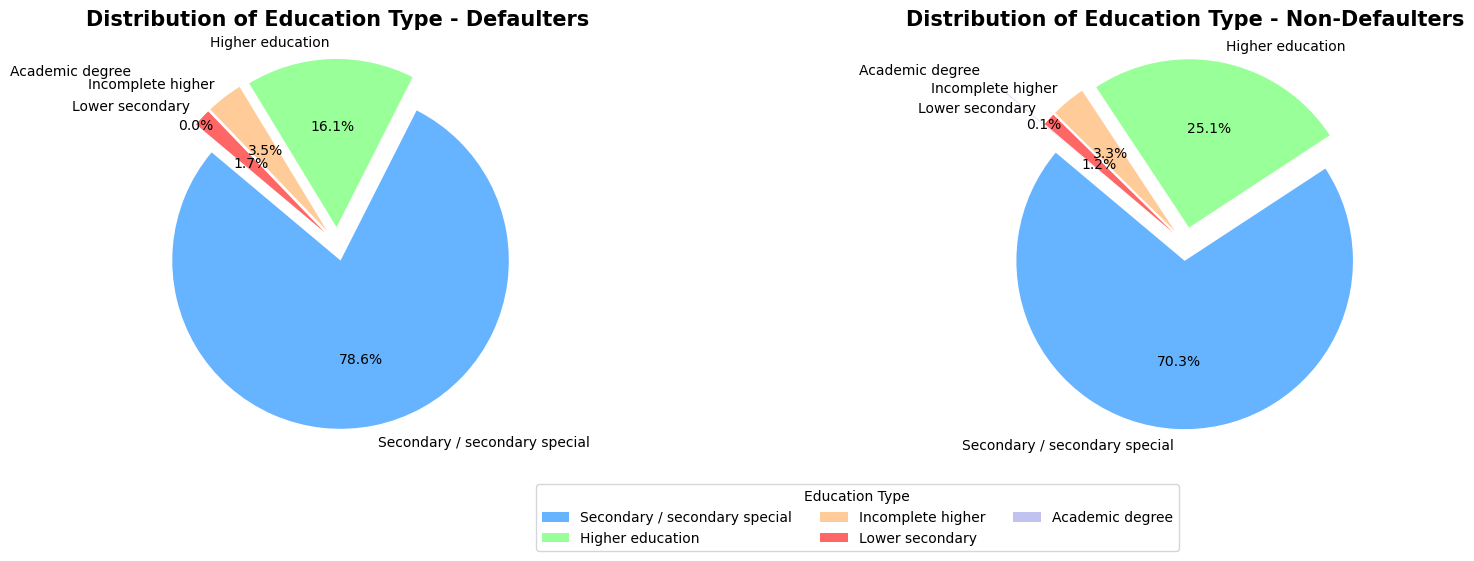

In [299]:
# Counting occurrences for each education type in both groups
defaulters_education_counts = have_difficulties['NAME_EDUCATION_TYPE'].value_counts()
non_defaulters_education_counts = have_no_difficulties['NAME_EDUCATION_TYPE'].value_counts()

# Setting up the figure for two pie charts
plt.figure(figsize=(14, 6))

# Plotting the pie chart for Defaulters
plt.subplot(1, 2, 1)
plt.pie(defaulters_education_counts, labels=defaulters_education_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666','#c2c2f0'], explode=[0.1,0.1,0.1,0.1,0.5])
plt.title('Distribution of Education Type - Defaulters', fontsize=15, fontweight='bold')


# Plotting the pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
plt.pie(non_defaulters_education_counts, labels=non_defaulters_education_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666','#c2c2f0'],explode=[0.1,0.1,0.1,0.1,0.5])
plt.title('Distribution of Education Type - Non-Defaulters', fontsize=15,fontweight='bold',)

# Adding a legend in the middle
plt.legend(defaulters_education_counts.index, title="Education Type", loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

# Displaying the plots
plt.legend(defaulters_education_counts.index, title="Education Type", loc="right", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show() 

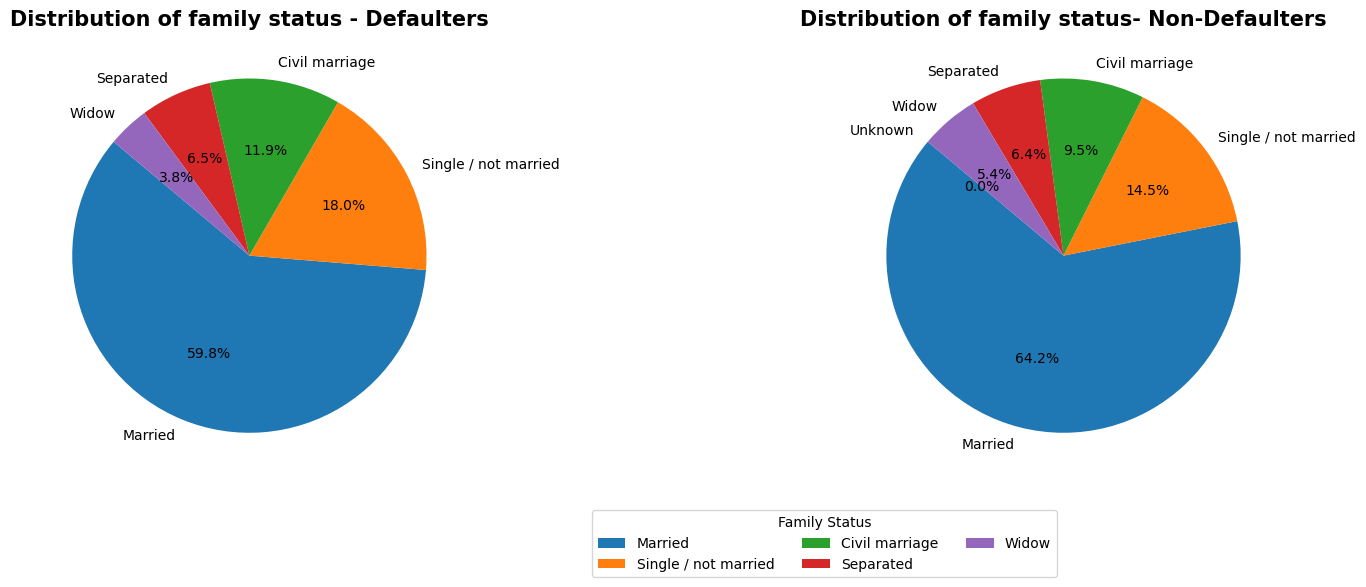

In [508]:
# Counting occurrences for family status in both groups
defaulters_family_status = have_difficulties['NAME_FAMILY_STATUS'].value_counts()
non_defaulters_family_status = have_no_difficulties['NAME_FAMILY_STATUS'].value_counts()

# Setting up the figure for two pie charts
plt.figure(figsize=(14, 6))

# Plotting the pie chart for Defaulters
plt.subplot(1, 2, 1)
plt.pie(defaulters_family_status, labels=defaulters_family_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of family status - Defaulters', fontsize=15, fontweight='bold')


# Plotting the pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
plt.pie(non_defaulters_family_status, labels=non_defaulters_family_status.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of family status- Non-Defaulters', fontsize=15,fontweight='bold',)

# Adding a legend in the middle
plt.legend(defaulters_family_status.index, title="Family Status", loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

# Displaying the plots
plt.legend(defaulters_family_status.index, title="Family Status", loc="right", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show() 

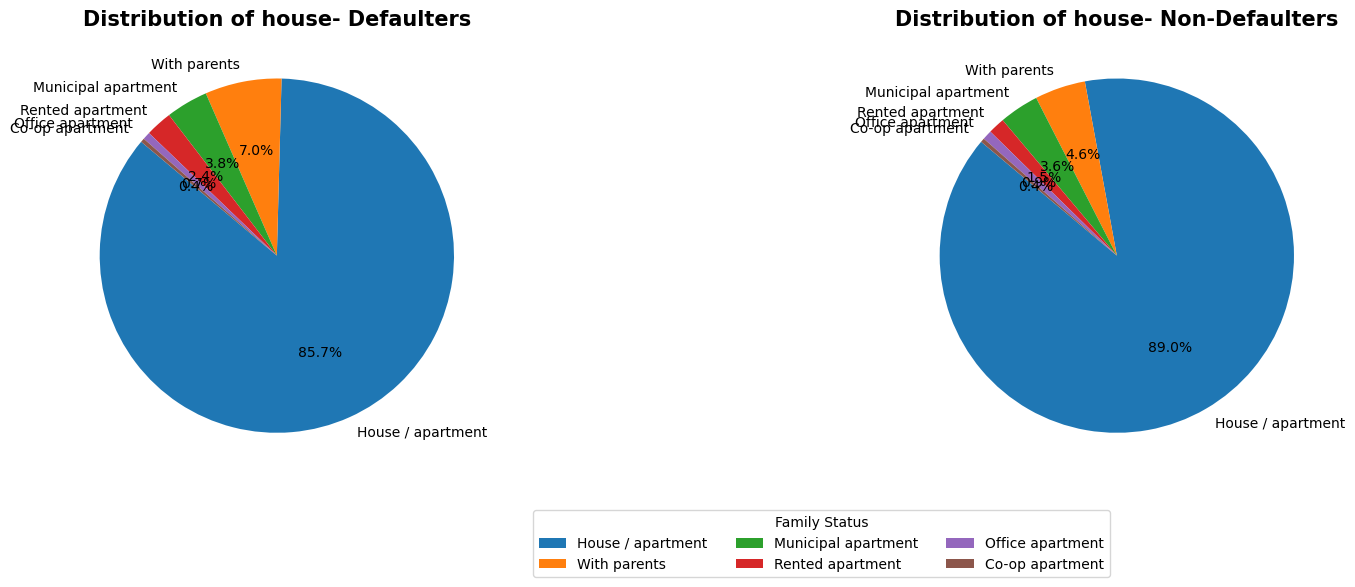

In [488]:
# Counting occurrences for housing type in both groups
defaulters_house = have_difficulties['NAME_HOUSING_TYPE'].value_counts()
non_defaulters_house = have_no_difficulties['NAME_HOUSING_TYPE'].value_counts()

# Setting up the figure for two pie charts
plt.figure(figsize=(14, 6))

# Plotting the pie chart for Defaulters
plt.subplot(1, 2, 1)
plt.pie(defaulters_house, labels=defaulters_house.index, autopct='%1.1f%%', startangle=140,)
plt.title('Distribution of house- Defaulters', fontsize=15, fontweight='bold')


# Plotting the pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
plt.pie(non_defaulters_house, labels=non_defaulters_house.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of house- Non-Defaulters', fontsize=15,fontweight='bold',)

# Adding a legend in the middle
plt.legend(defaulters_house.index, title="Family Status", loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3)

# Displaying the plots
plt.legend(defaulters_house.index, title="Family Status", loc="right", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show() 

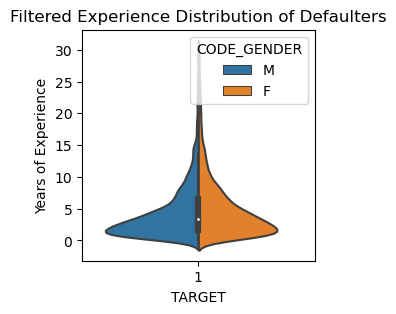

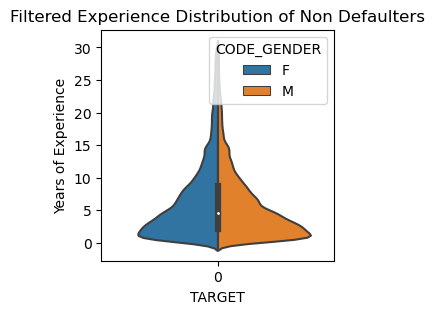

In [415]:
# Adding a new column 'experience_years' using .loc to avoid the SettingWithCopyWarning
have_difficulties.loc[:, 'experience_years'] = have_difficulties['DAYS_EMPLOYED'] / 365  # CHANE TO YEAR
have_no_difficulties.loc[:, 'experience_years'] = have_no_difficulties['DAYS_EMPLOYED'] / 365  # CHANGE TO YEAR

# Filter out unrealistic experience values
have_difficulties_filtered = have_difficulties[have_difficulties['experience_years'] <30]

# Plotting the violin plot again with filtered data
plt.figure(figsize=(3,3))
sns.violinplot(x='TARGET',y='experience_years', data=have_difficulties_filtered, hue='CODE_GENDER',split=True)
plt.title("Filtered Experience Distribution of Defaulters")
plt.ylabel("Years of Experience")
plt.show()


# Filter out unrealistic experience values and keep only 'M' and 'F' in CODE_GENDER
have_no_difficulties_filtered = have_no_difficulties[(have_no_difficulties['experience_years'] < 30) & 
                                                    (have_no_difficulties['CODE_GENDER'].isin(['M', 'F']))]

# Plotting the violin plot with filtered data
plt.figure(figsize=(3,3))
sns.violinplot(x='TARGET', y='experience_years', data=have_no_difficulties_filtered, hue='CODE_GENDER', split=True)
plt.title("Filtered Experience Distribution of Non Defaulters")
plt.ylabel("Years of Experience")
plt.show()

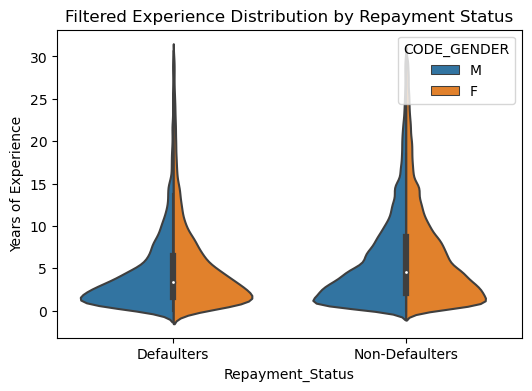

In [419]:
# Adding a new column 'Repayment_Status' without triggering the warning
have_difficulties_filtered = have_difficulties_filtered.copy()
have_difficulties_filtered.loc[:, 'Repayment_Status'] = 'Defaulters'

have_no_difficulties_filtered = have_no_difficulties_filtered.copy()
have_no_difficulties_filtered.loc[:, 'Repayment_Status'] = 'Non-Defaulters'

# Concatenate the two dataframes
combined_data = pd.concat([have_difficulties_filtered, have_no_difficulties_filtered])

# Plotting the violin plot for combined data
plt.figure(figsize=(6, 4))
sns.violinplot(x='Repayment_Status', y='experience_years', data=combined_data, hue='CODE_GENDER', split=True)
plt.title("Filtered Experience Distribution by Repayment Status")
plt.ylabel("Years of Experience")
plt.show()

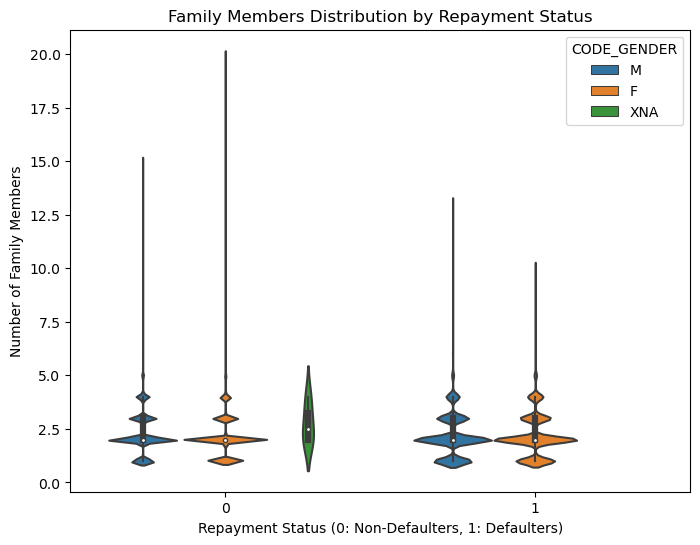

In [423]:
# Filtered data to include only necessary columns
data_filtered = app_data_clean.copy()  # Assuming 'app_data_clean' is your main DataFrame

# Plotting the violin plot for family members by repayment status
plt.figure(figsize=(8, 6))
sns.violinplot(x='TARGET', y='CNT_FAM_MEMBERS', data=app_data_clean, hue='CODE_GENDER')
plt.title("Family Members Distribution by Repayment Status")
plt.xlabel("Repayment Status (0: Non-Defaulters, 1: Defaulters)")
plt.ylabel("Number of Family Members")

plt.show()

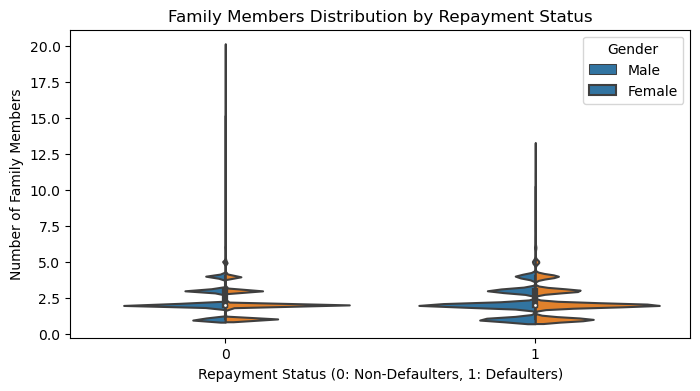

In [514]:
# Filter the data to exclude 'XNA' in 'CODE_GENDER'
filtered_data = app_data_clean[app_data_clean['CODE_GENDER'].isin(['M', 'F'])]

# Plotting the violin plot for family members by repayment status and gender
plt.figure(figsize=(8, 4))
sns.violinplot(x='TARGET', y='CNT_FAM_MEMBERS', data=filtered_data, hue='CODE_GENDER', split=True)
plt.title("Family Members Distribution by Repayment Status")
plt.xlabel("Repayment Status (0: Non-Defaulters, 1: Defaulters)")
plt.ylabel("Number of Family Members")
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

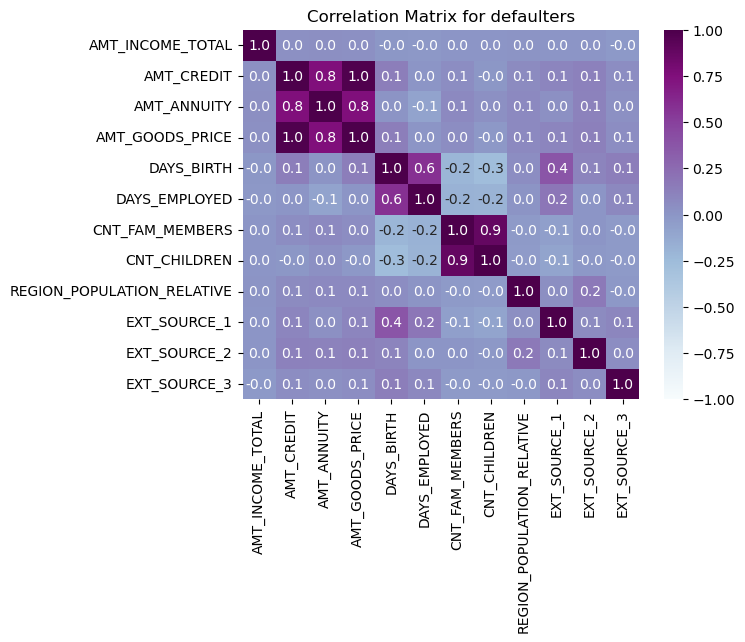

In [444]:
# to compute and visualize the correlation matrix of selected key features for defaulters

# Selecting key features for correlation analysis
selected_features_defaulters = have_difficulties[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                              'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                              'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                              'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 
                              'REGION_POPULATION_RELATIVE', 
                              'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

sns.heatmap(selected_features_defaulters.corr(),  annot=True, fmt=".1f", cmap="BuPu", cbar=True, vmin=-1, vmax=1,center=0)

# Setting the title of the heatmap
plt.title("Correlation Matrix for defaulters")

# Displaying the heatmap
plt.show()

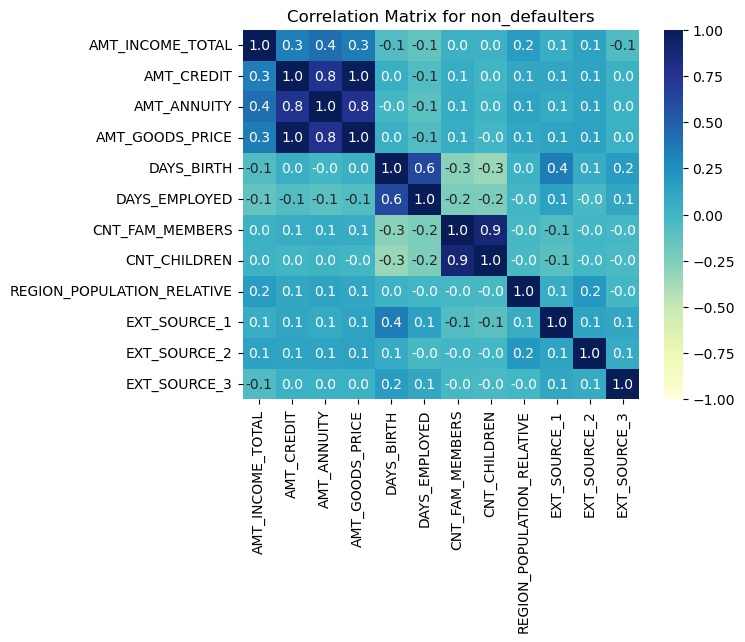

In [447]:
# to compute and visualize the correlation matrix of selected key features for non-defaulters

# Selecting key features for correlation analysis
selected_features_non_defaulters = have_no_difficulties[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 
                              'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                              'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                              'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 
                              'REGION_POPULATION_RELATIVE', 
                              'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

sns.heatmap(selected_features_non_defaulters.corr(),  annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, vmin=-1, vmax=1,center=0)

# Setting the title of the heatmap
plt.title("Correlation Matrix for non_defaulters")

# Displaying the heatmap
plt.show()

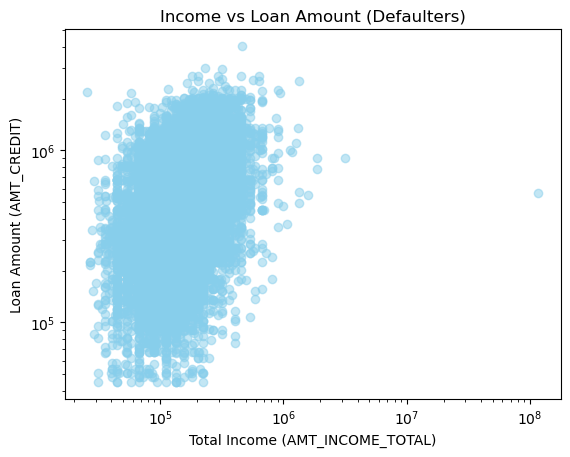

In [460]:
# Scatter plot for defaulters with logarithmic scales for both axes
plt.scatter(have_difficulties['AMT_INCOME_TOTAL'], have_difficulties['AMT_CREDIT'], alpha=0.5, color='skyblue')
plt.title('Income vs Loan Amount (Defaulters)')
plt.xlabel('Total Income (AMT_INCOME_TOTAL)')
plt.ylabel('Loan Amount (AMT_CREDIT)')

# Setting both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

plt.show()


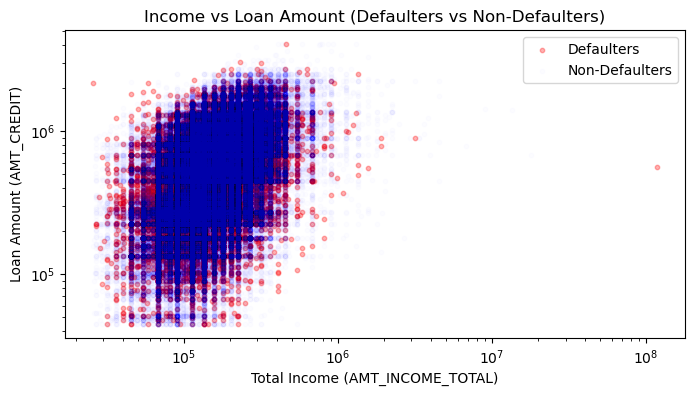

In [506]:
# Plot for defaulters
plt.figure(figsize=(8,4))
plt.scatter(have_difficulties['AMT_INCOME_TOTAL'], have_difficulties['AMT_CREDIT'], 
            color='red', alpha=0.3, s=10, label='Defaulters')  # Reduced opacity and point size for clarity

# Plot for non-defaulters
plt.scatter(have_no_difficulties['AMT_INCOME_TOTAL'], have_no_difficulties['AMT_CREDIT'], 
            color='blue', alpha=0.01, s=10, label='Non-Defaulters')  # Reduced opacity and point size for clarity

# Set labels and title for the plot
plt.xlabel('Total Income (AMT_INCOME_TOTAL)')
plt.ylabel('Loan Amount (AMT_CREDIT)')
plt.title('Income vs Loan Amount (Defaulters vs Non-Defaulters)')

# Adding a legend to distinguish defaulters from non-defaulters
plt.legend()

# Setting both axes to logarithmic scale to better visualize distribution
plt.xscale('log')
plt.yscale('log')


# Show the plot
plt.show()

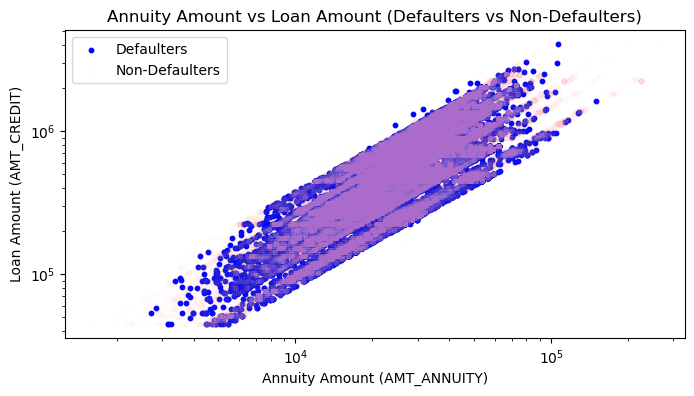

In [515]:
# Plot for defaulters
plt.figure(figsize=(8,4))
plt.scatter(have_difficulties['AMT_ANNUITY'], have_difficulties['AMT_CREDIT'], 
            color='blue',  s=10, label='Defaulters')  # Scatter plot for defaulters showing AMT_ANNUITY vs AMT_CREDIT

# Plot for non-defaulters
plt.scatter(have_no_difficulties['AMT_ANNUITY'], have_no_difficulties['AMT_CREDIT'], 
            color='pink', alpha=0.01, s=10, label='Non-Defaulters')  # Scatter plot for non-defaulters showing AMT_ANNUITY vs AMT_CREDIT

# Set labels and title for the plot
plt.xlabel('Annuity Amount (AMT_ANNUITY)')  # Updated x-axis label to reflect AMT_ANNUITY
plt.ylabel('Loan Amount (AMT_CREDIT)')  # Updated y-axis label to reflect AMT_CREDIT
plt.title('Annuity Amount vs Loan Amount (Defaulters vs Non-Defaulters)')  # Updated title for the plot

# Adding a legend to distinguish defaulters from non-defaulters
plt.legend()

# Setting both axes to logarithmic scale to better visualize distribution
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()
